In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('..\data\gdp_percapita.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shane\AppData\Local\Temp\ipykernel_19716\794972809.py:1: SyntaxWarning: invalid escape sequence '\d'
  gdp_df = pd.read_csv('..\data\gdp_percapita.csv')


In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN


gdp_df = gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [10]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [11]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value' : 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [13]:
gdp_df.value_counts('Country')

Country
Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (excluding high income)    33
Middle income                                         33
Mongolia                                              33
                                                      ..
Kosovo                                                15
Sint Maarten (Dutch part)                             14
Turks and Caicos Islands                              12
Somalia                                               10
Djibouti                                              10
Name: count, Length: 242, dtype: int64

In [14]:
df_by_ctry = gdp_df.groupby('Country').nunique()
df_by_ctry.reset_index()
df_by_ctry

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
...,...,...
Viet Nam,33,33
West Bank and Gaza,29,29
World,33,33


In [15]:
df1 = df_by_ctry.groupby('Year')
df1.head()

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
Angola,33,33
Aruba,32,32
Bhutan,32,32
Bosnia and Herzegovina,29,29


In [16]:
df = gdp_df.groupby('Country')['Year'].nunique()
df.head(10)

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
Angola                         33
Antigua and Barbuda            33
Arab World                     33
Argentina                      33
Armenia                        33
Name: Year, dtype: int64

In [17]:
df.describe()

count    242.000000
mean      31.661157
std        3.927885
min       10.000000
25%       33.000000
50%       33.000000
75%       33.000000
max       33.000000
Name: Year, dtype: float64

In [18]:
country_counts = gdp_df.value_counts('Country')
country_counts = country_counts.reset_index()
country_counts

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (excluding high inc...,33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [20]:
df20 = gdp_df.loc[gdp_df['Year']==2020]
df20

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [21]:
afg20 = gdp_df.loc[gdp_df['Country']=='Afghanistan']
afg20

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

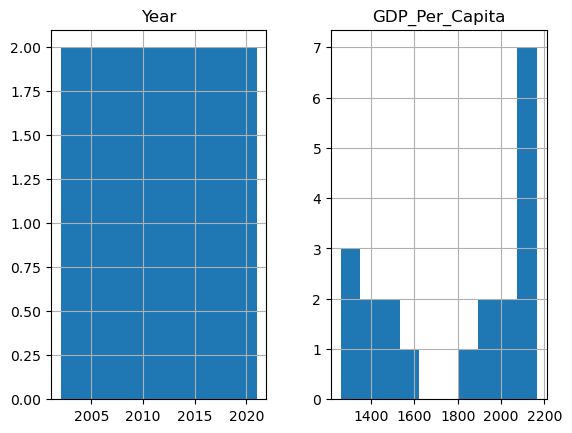

In [22]:
afg20.hist()

<Axes: xlabel='GDP_Per_Capita', ylabel='Country'>

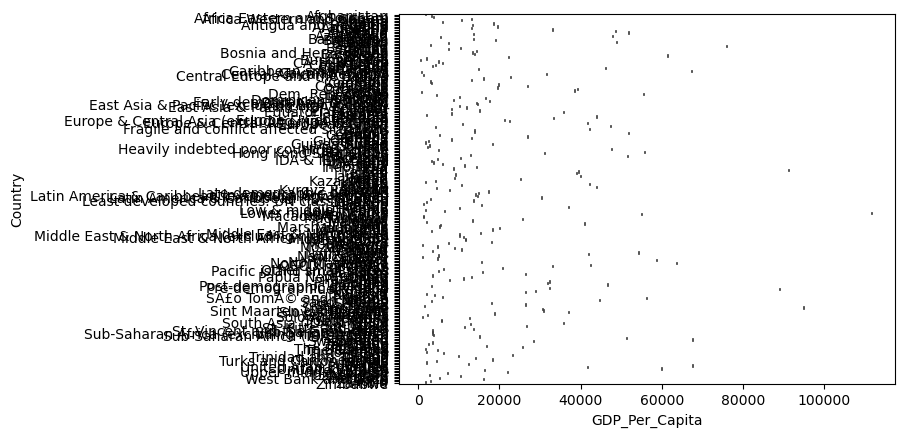

In [23]:

sns.violinplot(x=df20['GDP_Per_Capita'], y=df20['Country'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

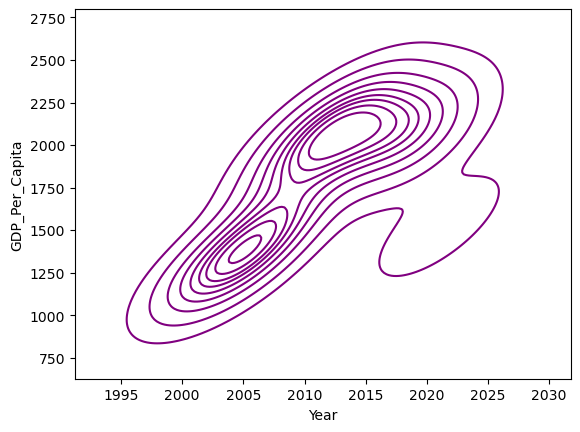

In [24]:
sns.kdeplot(data=afg20, x='Year', y = 'GDP_Per_Capita', color="purple")

<Axes: xlabel='GDP_Per_Capita', ylabel='Country'>

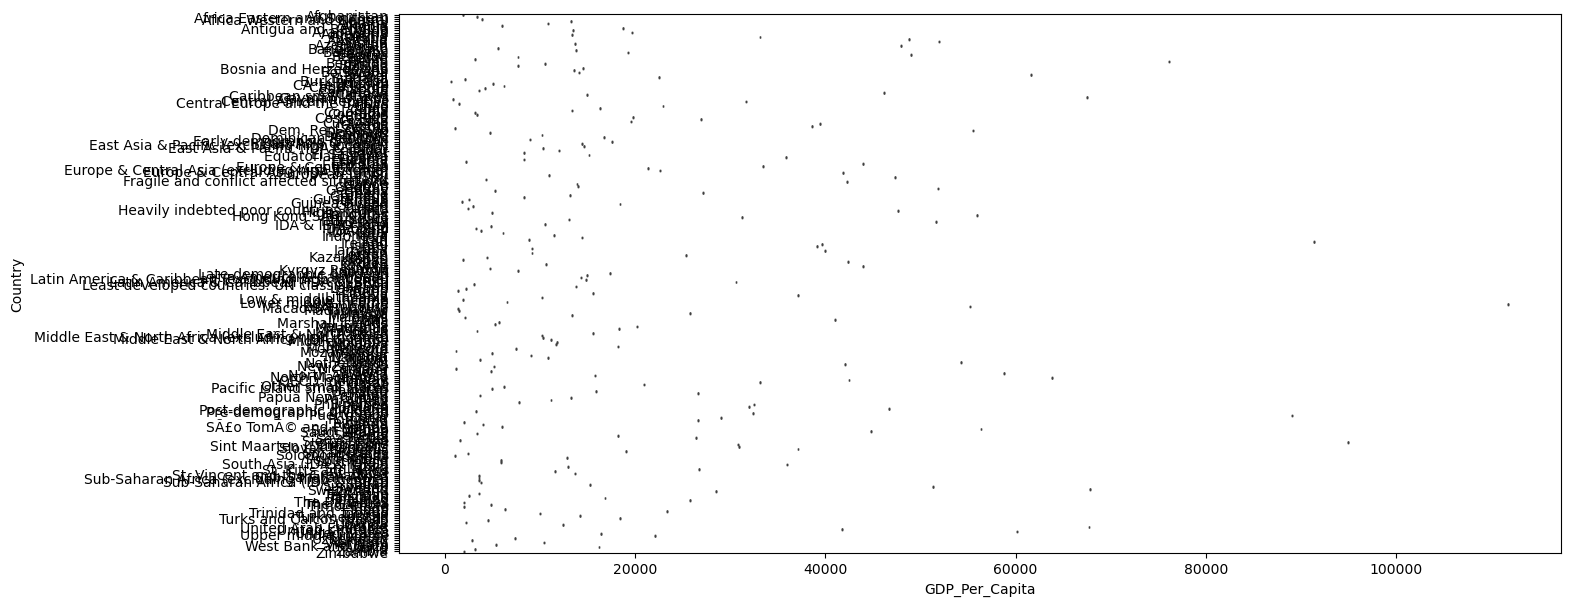

In [26]:
plt.figure(figsize = (15, 7))

sns.boxplot( y=df20['Country'], x=df20['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [38]:
df20.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764


In [40]:
df20['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [42]:
df90 = gdp_df.loc[gdp_df['Year']==1990]
df00 = gdp_df.loc[gdp_df['Year']==2000]
df10 = gdp_df.loc[gdp_df['Year']==2010]

In [62]:
gdp_decades = pd.concat([df90, df00, df10, df20], ignore_index = True)
gdp_decades

,Country,Year,GDP_Per_Capita
0,Africa Eastern and Southern,1990,3037.297466
1,Africa Western and Central,1990,2788.301039
2,Albania,1990,4827.027705
3,Algeria,1990,8828.874473
4,Angola,1990,5793.084512
...,...,...,...
916,Viet Nam,2020,10450.622382
917,West Bank and Gaza,2020,5402.538773
918,World,2020,16204.169107
919,Zambia,2020,3183.650773


In [88]:
gdp_dec = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_dec

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [90]:
gdp_decades.groupby('Year')['GDP_Per_Capita'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1990,207.0,12506.088374,15167.399935,460.123697,2915.057031,6223.452994,14584.911473,105893.626059
2000,233.0,15428.302468,18214.648347,628.693279,3190.036710,8702.082651,18330.928329,99301.526999
2010,239.0,18684.624440,20246.244405,804.354941,4133.998621,11281.255733,24579.588217,114343.988089
2020,242.0,19586.754446,19640.401631,711.355263,4961.408532,13357.997573,27064.125293,111751.314751


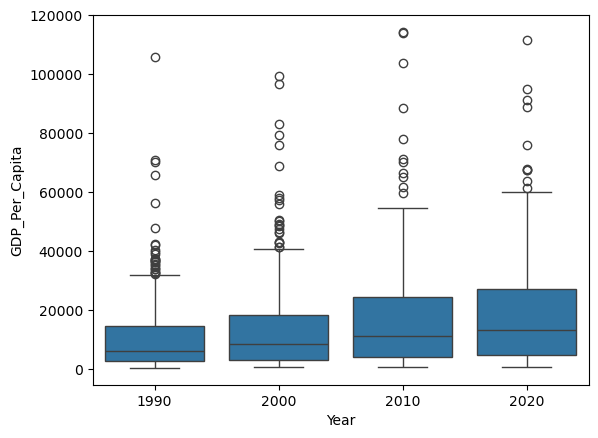

In [94]:
sns.boxplot(data = gdp_decades,
            x = 'Year',
           y = 'GDP_Per_Capita');

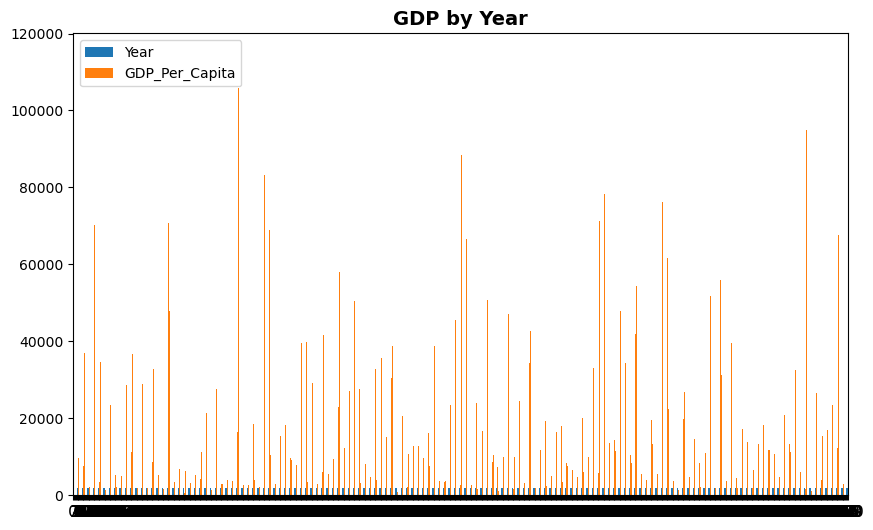

In [104]:
gdp_decades.plot(kind = 'bar',
                                        figsize = (10,6))               # Increase the plot size                

plt.xticks(rotation = 0,                                                # Remove the rotation of the labels
           fontsize = 12)                   
plt.title('GDP by Year',                              # Add a title
         fontsize = 14,
         fontweight = 'bold');

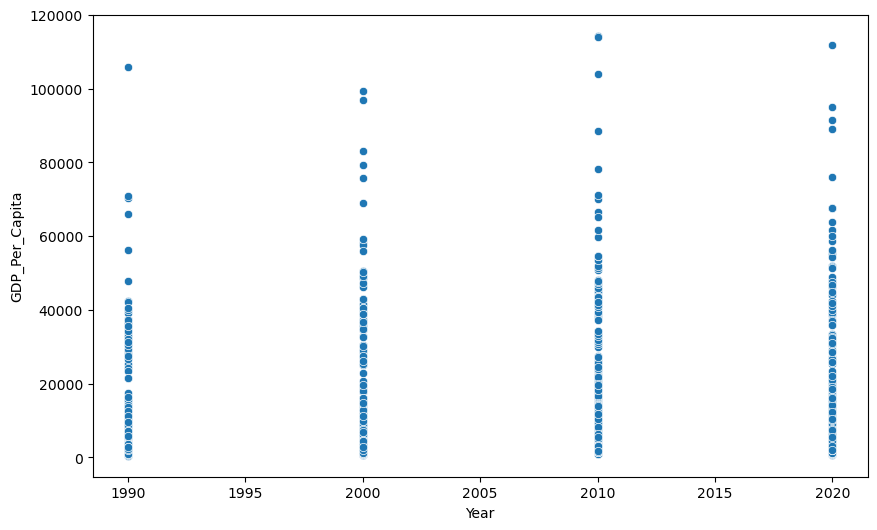

In [118]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = gdp_decades,
               x = 'Year',
               y = 'GDP_Per_Capita',
               );

11. Which country was the first to have a GDP per capita greater than $100,000?

In [120]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [ ]:
gdp_gt100 = gdp_df.loc[gdp_df['GDP_Per_Capita'] > 1000

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


16. Look at the number of observations in this dataset per year. What do you notice?


17. What is the first year to have a non-zero internet users percentage value?


18. How does the distribution of internet users percent differ for 2000 and 2014?


19. For how many countries was the percentage of internet users below 5% in 2014?


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.
